## Import Libraries

In [1]:
%autosave 60
%load_ext autoreload
%autoreload 2

Autosaving every 60 seconds


In [2]:
# Import Libraries
import pandas as pd
import warnings
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset
from darts.models import NaiveSeasonal, AutoARIMA
import unittest

# Libraries Settings
warnings.filterwarnings('ignore')

## Import Functions

In [3]:
# Import Functions for Data Preprocessing
from src.preprocess import dataset_info, skewness_checking, outlier_handling, interpolate_quart_to_month, pearson_corr_features_name

# Import Functions for Plotting
from src.plot import plot_distribution, plot_missing_values, plot_pred, plot_pred_ml

# Import Functions for Training
from src.train import eval_model, eval_model_ml, model_pkl, pred_model, pred_ml_model

# Import Functions for Utility
from src.utils import month_diff_ts, load_dw

## Unit Test

### Data Preprocessing Module

In [4]:
# Conduct unit test on preprocess modules
class TestPreprocess(unittest.TestCase):
        
        def test_dataset_info(self):
            df = AirPassengersDataset().load()
            self.assertEqual(dataset_info(df), (144, 1))
            
        def test_skewness_checking(self):
            df = AirPassengersDataset().load()
            self.assertEqual(skewness_checking(df), (0.631, 0.821))
            
        def test_outlier_handling(self):
            df = AirPassengersDataset().load()
            self.assertEqual(outlier_handling(df), (0.631, 0.821))
            
        def test_interpolate_quart_to_month(self):
            df = MonthlyMilkDataset().load()
            self.assertEqual(interpolate_quart_to_month(df), (168, 1))
            
        def test_pearson_corr_features_name(self):
            df = AirPassengersDataset().load()
            self.assertEqual(pearson_corr_features_name(df), ['AirPassengers'])

### Plotting Module

In [5]:
# Conduct unit test on plot modules
class TestPlot(unittest.TestCase):

        def test_plot_distribution(self):
            df = AirPassengersDataset().load()
            self.assertEqual(plot_distribution(df), None)

        def test_plot_missing_values(self):
            df = AirPassengersDataset().load()
            self.assertEqual(plot_missing_values(df), None)
            
        def test_plot_pred(self):
            df = AirPassengersDataset().load()
            self.assertEqual(plot_pred(df), None)
            
        def test_plot_pred_ml(self):
            df = AirPassengersDataset().load()
            self.assertEqual(plot_pred_ml(df), None)

### Training Module

In [6]:
# Conduct unit test on train modules
class TestTrain(unittest.TestCase):

        def eval_model(self):
            df = AirPassengersDataset().load()
            self.assertEqual(eval_model(df), None)
        
        def eval_model_ml(self):
            df = AirPassengersDataset().load()
            self.assertEqual(eval_model_ml(df), None)

        def model_pkl(self):
            df = AirPassengersDataset().load()
            self.assertEqual(model_pkl(df), None)

        def pred_model(self):
            df = AirPassengersDataset().load()
            self.assertEqual(pred_model(df), None)
        
        def pred_ml_model(self):
            df = AirPassengersDataset().load()
            self.assertEqual(pred_ml_model(df), None)

### Utility Module

In [7]:
# Conduct unit test on utility modules
class TestUtils(unittest.TestCase):
    
            def test_month_diff_ts(self):
                df = AirPassengersDataset().load()
                self.assertEqual(month_diff_ts(df), (0.631, 0.821))
                
            def test_load_dw(self):
                df = AirPassengersDataset().load()
                self.assertEqual(load_dw(df), (0.631, 0.821))

## Error-free & Error Handling 

### Data Preprocessing Module

#### 'outlier_handling' Function Test

In [8]:
# Test with known outliers to check if they are properly capped.

# Create a dataframe with an outlier value
df_outlier = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]})

# Handle outliers using outlier_handling function
outlier_handling(df_outlier, 'A')

# Check if the outlier is properly capped
df_outlier

,A
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [9]:
# Test with no outliers to ensure the data remains unchanged.

# Create a dataframe with no outlier value
df_no_outlier = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# Handle outliers using outlier_handling function
outlier_handling(df_no_outlier, 'A')

# Check if the data remains unchanged
df_no_outlier

,A
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,9.0
9,10.0


### 'interpolate_quart_to_month' Function Test

In [10]:
# Test interpolation accuracy with mock quarterly data.

# Create a dataframe with mock quarterly data and DateTime index
df_quart = pd.DataFrame({'A': [1, 4, 7, 10]}, index=pd.date_range('2000-01-01', periods=4, freq='QS'))

# Interpolate quarterly data to monthly data
df_month = interpolate_quart_to_month(df=df_quart, column='A')

# Check if the data is properly interpolated
df_month

,date,household_consumption
0,2000-01-01,1.000000
1,2000-02-01,2.019971
2,2000-03-01,2.976400
3,2000-04-01,4.000000
4,2000-05-01,4.990593
5,2000-06-01,6.012977
6,2000-07-01,7.000000
7,2000-08-01,8.016221
8,2000-09-01,9.027415
9,2000-10-01,10.000000


In [11]:
# Test behavior with non-date indexed DataFrame.

# Create a dataframe with mock quarterly data and non-DateTime index
df_quart = pd.DataFrame({'A': [1, 4, 7, 10]}, index=[1, 2, 3, 4])

# Interpolate quarterly data to monthly data
df_month = interpolate_quart_to_month(df=df_quart, column='A')

# Check if the data is properly interpolated
df_month

The dataframe has no DateTime index


### pearson_corr_features_name Function Test

In [12]:
# Test with a DataFrame to ensure it returns correct correlated features.

# Create a dataframe with mock data
df_corr = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [1, 2, 3, 4, 5], 'C': [1, 2, 3, 4, 5], 'D': [1, 2, 3, 4, 5]})

# Check if the function returns correct correlated features
features = pearson_corr_features_name(df_corr, 'A', threshold=0.5 )

# Show the correlated features
features

['B', 'C', 'D']

In [13]:
# Test with a threshold that no feature meets to ensure an empty list is returned.

# Create a dataframe with mock data
df_corr = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [5, 4, 3, 2, 1], 'C': [5, 4, 3, 2, 1], 'D': [5, 4, 3, 2, 1]})

# Check if the function returns an empty list
features = pearson_corr_features_name(df_corr, 'A', threshold=0.9 )

# Show the correlated features
features

[]

## Plotting Module

### 'plot_distribution' Function Test

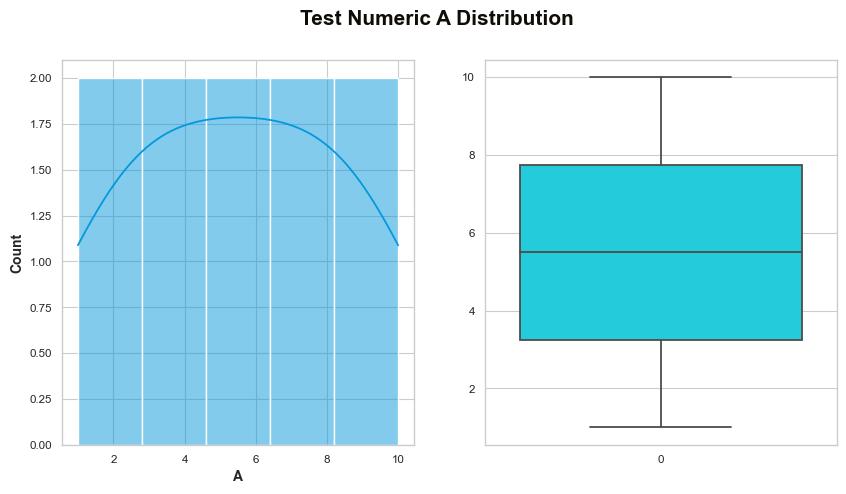

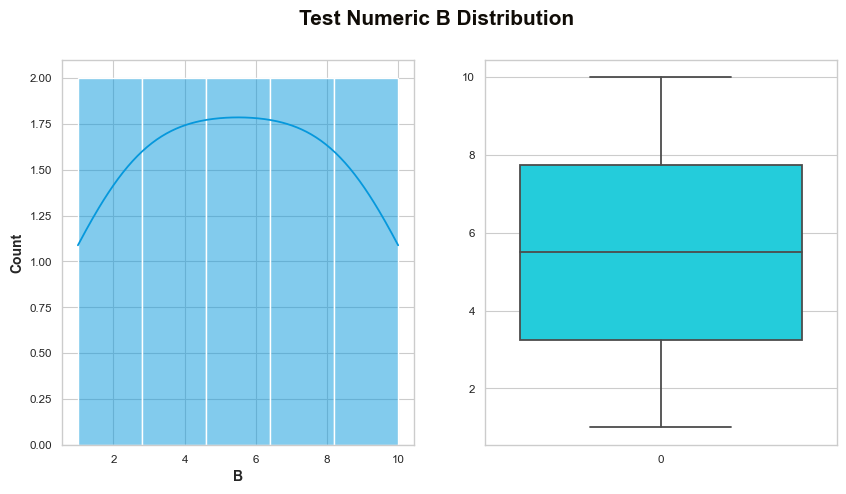

In [14]:
# Test function so that it correctly plots distributions for a DataFrame with numerical columns.

# Create a DataFrame
df_numeric = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                            'B': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# Plot distributions using plot_distribution function
plot_distribution(df_numeric, 'Test Numeric')


In [15]:
# Test function so that it correctly plots distributions for a DataFrame with no numerical columns.

# Create a DataFrame
df_non_numeric = pd.DataFrame({'A': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
                                 'B': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']})

# Plot distributions using plot_distribution function
plot_distribution(df_non_numeric, 'Test Non-Numeric')

### 'plot_missing_values' Function Test

Test Missing
A    1
B    0
dtype: int64


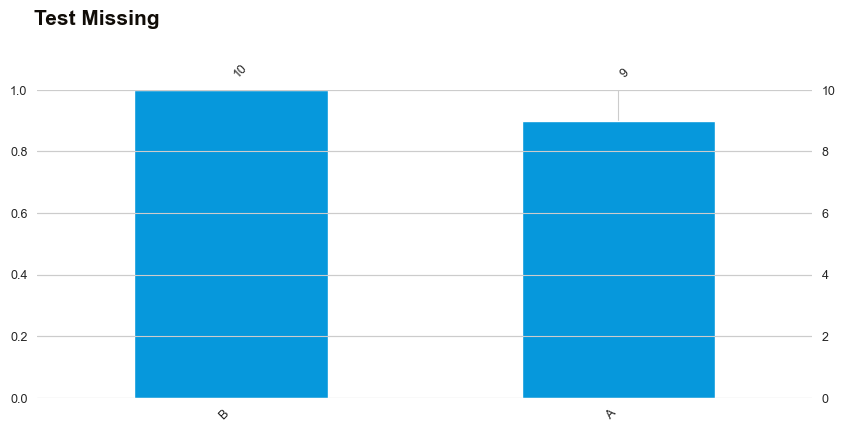

In [16]:
# Test function so that it correctly plots missing values for a DataFrame with missing values.

# Create a DataFrame
df_missing = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                            'B': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# Add missing values
df_missing.loc[0, 'A'] = None

# Plot missing values using plot_missing_values function
plot_missing_values(df_missing, 'Test Missing')

Test No Missing
A    0
B    0
dtype: int64


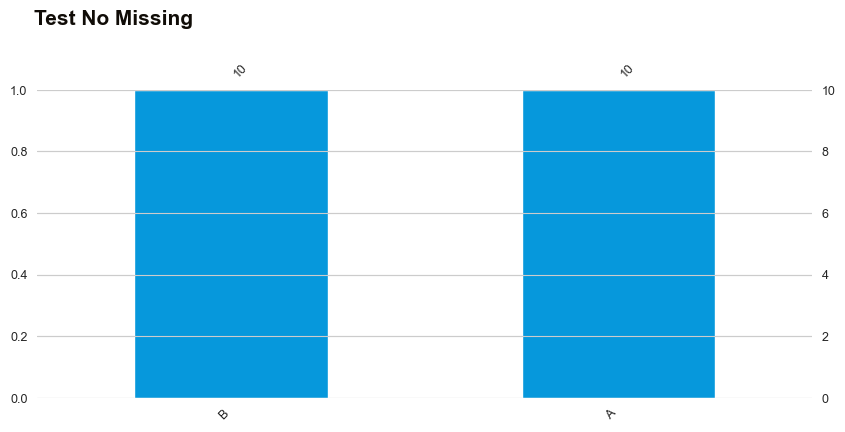

In [17]:
# Test function so that it correctly plots missing values for a DataFrame with no missing values.

# Create a DataFrame
df_no_missing = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                            'B': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# Plot missing values using plot_missing_values function
plot_missing_values(df_no_missing, 'Test No Missing')

### 'plot_pred' Function Test

In [18]:
# Import AirPassengersDataset from darts.datasets
series_air = AirPassengersDataset().load()

# Split into training and validation sets
train_air, val_air = series_air.split_after(0.80)

# Instantiate simple Naive Seasonal model
naive_model = NaiveSeasonal(K=12)

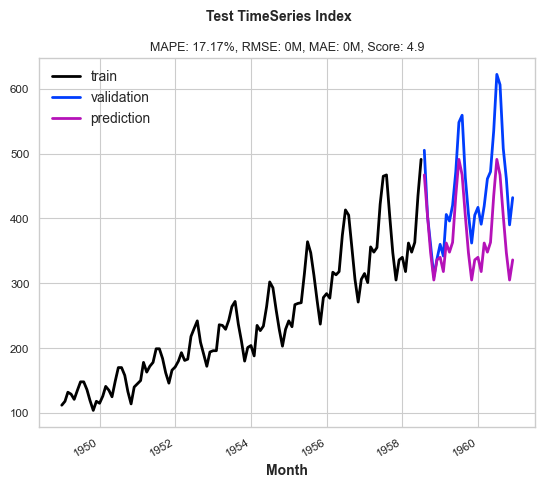

In [19]:
# Test function for a DataFrame with TimeSeries index.

# Plot predictions using plot_pred function
plot_pred(model=naive_model, len=len(val_air), train=train_air, val=val_air, suptitle='Test TimeSeries Index')

In [20]:
# Test function for a DataFrame with no TimeSeries index.

# Create a DataFrame with no TimeSeries index
df_no_ts = pd.DataFrame({'A': [1, 2, 3, 4, 5 ,6 ,7 ,8, 9, 10, 11, 12]}, index=[1, 2, 3, 4, 5 ,6 ,7 ,8, 9, 10, 11, 12])

# Plot predictions using plot_pred function
plot_pred(model=naive_model, len=len(df_no_ts), train=df_no_ts, val=df_no_ts, suptitle='Test Non-Numeric')


Input is not a TimeSeries.


### 'plot_pred_ml' Function Test

In [21]:
# Instantiatiate AutoARIMA model
auto_arima_model = AutoARIMA()

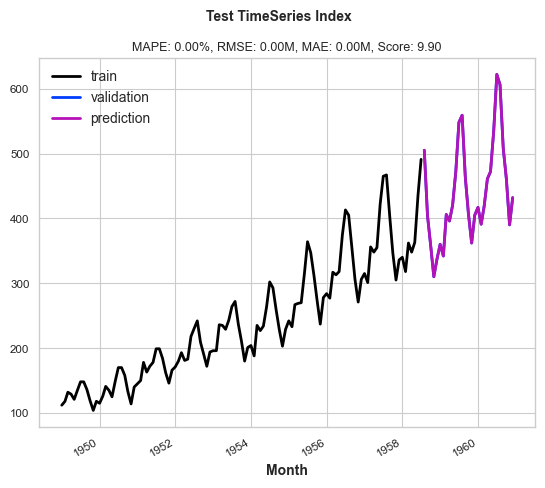

In [22]:
# Test function for a DataFrame with TimeSeries index.

# Plot predictions using plot_pred_ml function
plot_pred_ml(model=auto_arima_model, len=len(val_air), train=train_air, val=val_air, cov=series_air, suptitle='Test TimeSeries Index')

In [23]:
# Test function for a DataFrame with no TimeSeries index.

# Create a DataFrame with no TimeSeries index
df_no_ts = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'B': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}, 
                         index=[1, 2, 3, 4, 5 ,6 ,7 ,8, 9, 10, 11, 12])

# Plot predictions using plot_pred_ml function
plot_pred_ml(model=auto_arima_model, len=len(df_no_ts), train=df_no_ts, val=df_no_ts, cov=df_no_ts, suptitle='Test Non-TimeSeries')



Input is not a TimeSeries.


## Training Module

### 'eval_model' Function Test

In [24]:
# Test function for with TimeSeries data.
eval_model(model=naive_model, len=len(val_air), train=train_air, val=val_air)

NaiveSeasonal(K=12) - MAPE: 17.17%, RMSE: 0.00M, MAE: 0.00M, Score: 4.9


In [25]:
# Test function with non-TimeSeries data.
eval_model(model=naive_model, len=len(df_no_ts), train=df_no_ts, val=df_no_ts)

Please input TimeSeries data.


### 'eval_model_ml' Function Test

In [26]:
# Test function with TimeSeries data.
eval_model_ml(model=auto_arima_model, len=len(val_air), train=train_air, val=val_air, cov=series_air)

AutoARIMA() - MAPE: 0.00%, RMSE: 0M, MAE: 0M, Score: 9.9


In [27]:
# Test function with non-TimeSeries data.
eval_model_ml(model=auto_arima_model, len=len(df_no_ts), train=df_no_ts, val=df_no_ts, cov=df_no_ts)

Please input TimeSeries data.


### 'model_pkl' Function Test

In [28]:
# Test saving a trained model to check if the file is correctly created at the specified location.
model_pkl(model=naive_model, pickle_name='test_model', filepath=r"C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\")

test_model saved to C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\


In [29]:
#  Test saving a trained model to an invalid location to check if the function returns an error.
model_pkl(model=naive_model, pickle_name='test_model', filepath=r"C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\test\\")

Please enter valid filepath.


### 'pred_model' Function Test

In [30]:
# Test function with TimeSeries data
pred_model(model=naive_model, len=len(val_air), train=train_air)

<TimeSeries (DataArray) (Month: 29, component: 1, sample: 1)>
array([[[467.]],

       [[404.]],

       [[347.]],

       [[305.]],

       [[336.]],

       [[340.]],

       [[318.]],

       [[362.]],

       [[348.]],

       [[363.]],

...

       [[362.]],

       [[348.]],

       [[363.]],

       [[435.]],

       [[491.]],

       [[467.]],

       [[404.]],

       [[347.]],

       [[305.]],

       [[336.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1958-08-01 1958-09-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [31]:
# Test function with non-TimeSeries data
pred_model(model=naive_model, len=len(df_no_ts), train=df_no_ts)

Please input TimeSeries data.


### 'pred_ml_model' Function Test

In [32]:
# Test function with TimeSeries data
pred_ml_model(model=auto_arima_model, len=len(val_air), train=train_air, cov=series_air)

<TimeSeries (DataArray) (Month: 29, component: 1, sample: 1)>
array([[[504.99999974]],

       [[404.00000164]],

       [[359.00000249]],

       [[310.00000341]],

       [[337.00000291]],

       [[360.00000247]],

       [[342.00000281]],

       [[406.0000016 ]],

       [[396.00000179]],

       [[420.00000134]],

...

       [[419.00000136]],

       [[461.00000057]],

       [[472.00000036]],

       [[534.99999917]],

       [[621.99999753]],

       [[605.99999783]],

       [[507.99999968]],

       [[461.00000057]],

       [[390.00000191]],

       [[432.00000111]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1958-08-01 1958-09-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [33]:
# Test function with non-TimeSeries data
pred_ml_model(model=auto_arima_model, len=len(df_no_ts), train=df_no_ts, cov=df_no_ts)

Please input TimeSeries data.


## Utility Module

### 'month_diff_ts' Function Test

In [34]:
# Test function with TimeSeries data
month_diff_ts(ts1=train_air, ts2=val_air)

29

In [35]:
# Test function with non-TimeSeries data
month_diff_ts(ts1=df_no_ts, ts2=df_no_ts)

Please input TimeSeries objects.


### 'load_dw' Function Test

In [36]:
# Test function valid server address
load_dw(server=r'LAPTOP-14FUNTO5\NEWSERVER;', dw_name='dksp_dashboard')

Successfully connected to the data warehouse.


Engine(mssql+pyodbc:///?odbc_connect=DRIVER%3D%7BODBC+Driver+17+for+SQL+Server%7D%3BSERVER%3DLAPTOP-14FUNTO5%5CNEWSERVER%3B%3BDATABASE%3Ddksp_dashboard%3BTrusted_Connection%3Dyes%3B)

In [37]:
# Test function invalid server address
load_dw(server=999, dw_name='dksp_dashboard')

Invalid server address.
